In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
import pickle

In [ ]:
# In[3]:


user=pd.read_csv('/content/drive/MyDrive/users.csv')
fake=pd.read_csv('/content/drive/MyDrive/fusers.csv')

In [ ]:
# In[4]:


#adding a column for detecting fake or not
idNo_user=np.zeros(1481) #zero is adding for user
idNo_fake=np.ones(1337)   #ones is adding for fake users


In [ ]:
# In[5]:


user["isFake"]=idNo_user
fake["isFake"]=idNo_fake

In [ ]:
# In[6]:


df_user=pd.concat([user,fake],ignore_index=True)
df_user.columns

Index(['id', 'name', 'screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'isFake'],
      dtype='object')

In [ ]:
# In[7]:


#shuffle the whole data
df_user=df_user.sample(frac=1).reset_index(drop=True)


In [ ]:
# In[8]:


# Detecting outliers with IQR
Q1 = df_user.quantile(0.25)
Q3 = df_user.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                              2.556806e+08
fav_number                      3.588250e+03
statuses_count                  1.052750e+03
followers_count                 9.400000e+01
friends_count                   3.510000e+02
favourites_count                3.700000e+01
listed_count                    1.000000e+00
default_profile                 0.000000e+00
default_profile_image           0.000000e+00
geo_enabled                     0.000000e+00
profile_use_background_image    0.000000e+00
profile_background_tile         0.000000e+00
utc_offset                      0.000000e+00
protected                                NaN
verified                                 NaN
isFake                          1.000000e+00
dtype: float64


In [ ]:
# In[9]:


# Removing outliers from dataset
df_user = df_user[~((df_user < (Q1 - 1.5 * IQR)) |(df_user > (Q3 + 1.5 * IQR))).any(axis=1)]
df_user.shape


(1489, 36)

In [ ]:

# In[10]:


y=df_user['isFake']
x=df_user.drop(['isFake'], axis=1)



In [ ]:
# In[11]:



for col_name in df_user.columns:
    if df_user[col_name].dtype == 'object':
        le = LabelEncoder()
        df_user[col_name] = le.fit_transform(df_user[col_name])

# Display the first 20 rows
df_user.head(20)


,id,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,isFake
1,617506290,597,742,1491,54,24,657,0,0,1049,...,0,57,1,NaN,NaN,NaN,856,0,1,1.0
2,617301783,531,683,2395,35,15,308,0,0,990,...,0,57,1,NaN,NaN,NaN,475,0,1,1.0
3,616579375,1342,1298,731,37,19,411,0,0,728,...,0,57,1,NaN,NaN,NaN,1169,0,1,1.0
4,617438377,1119,1218,8,34,22,286,0,0,1050,...,0,57,1,NaN,NaN,NaN,329,0,1,1.0
6,617638457,1249,1222,549,20,9,334,0,0,150,...,0,57,1,NaN,NaN,NaN,1289,0,1,1.0
7,361784332,999,783,644,2032,184,632,14,0,1128,...,41,57,1,NaN,NaN,NaN,561,1,0,0.0
8,616231144,601,748,0,40,22,468,0,0,599,...,0,57,1,NaN,NaN,NaN,1297,0,1,1.0
9,618195959,769,917,5196,26,13,262,0,0,230,...,0,57,1,NaN,NaN,NaN,25,0,1,1.0
10,619363108,883,994,675,17,20,282,0,0,1289,...,0,57,1,NaN,NaN,NaN,354,0,1,1.0
12,620466927,780,921,487,20,21,267,0,0,1411,...,0,57,1,NaN,NaN,NaN,497,0,1,1.0


In [ ]:
# In[12]:


df_user=df_user[[

     'followers_count',
     'friends_count',
     'listed_count',
     'lang',
     'default_profile',
     'profile_use_background_image',
     'profile_background_tile',

     ]]



In [ ]:
# In[13]:


df_user=df_user.fillna(0)


In [ ]:
# In[14]:


X=df_user

In [ ]:
# In[15]:


#dataset-2
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)



In [ ]:
# In[16]:


cols = x_train.columns


In [ ]:
# In[17]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)



In [ ]:
# In[18]:


rfc=RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
# Evaluating on Training set
y_pred_train = rfc.predict(x_train)
print(classification_report(y_train, y_pred_train))
y_pred_test = rfc.predict(x_test)
print(classification_report(y_test, y_pred_test))
accuracy1 = metrics.accuracy_score(y_test, y_pred_test)
print(accuracy1)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       364
         1.0       1.00      1.00      1.00       752

    accuracy                           1.00      1116
   macro avg       1.00      1.00      1.00      1116
weighted avg       1.00      1.00      1.00      1116

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       109
         1.0       1.00      1.00      1.00       264

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373

0.9946380697050938


In [ ]:
# In[19]:


from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,y_pred=y_pred_test)


array([[108,   1],
       [  1, 263]])

In [ ]:
# In[20]:


k =10
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(rfc,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(rfc,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(rfc,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(rfc,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 99.59640848902593
precision: 99.6161951480808
f1_score: 99.75788327072348
Recall: 99.80841164127361


In [ ]:
# In[21]:


with open('model.pkl','wb') as f:
    pickle.dump(rfc,f)


In [ ]:
# In[22]:


rfc_model=pickle.load(open('model.pkl','rb'))

In [ ]:
# In[23]:


# train a Gaussian Naive Bayes classifier on the training set
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import classification_report

# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
accuracy2 = metrics.accuracy_score(y_test, y_pred)

Model accuracy score: 0.2922


In [ ]:
# In[24]:


y_pred_train = gnb.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9928


In [ ]:
# In[25]:


# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))


Training set score: 0.9928
Test set score: 0.2922


In [ ]:
# In[26]:


print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45       109
         1.0       0.00      0.00      0.00       264

    accuracy                           0.29       373
   macro avg       0.15      0.50      0.23       373
weighted avg       0.09      0.29      0.13       373



In [ ]:
# In[27]:


from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[109,   0],
       [264,   0]])

In [ ]:
# In[28]:


k =10
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(gnb,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(gnb,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(gnb,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(gnb,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)


accuracy: 99.19372392526755
precision: 99.02077878764379
f1_score: 99.40621117417422
Recall: 99.80149371069183


In [ ]:

# In[29]:


#from sklearn.ensemble import  GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators = 15, max_features = None, min_samples_split = 2)
gbc.fit(x_train, y_train.values.ravel())

# evaluate the model on Training data
accuracy = gbc.score(x_train, y_train)
print('    Training Accuracy:    ' + str(round(accuracy,3)) + '%')

y_pred=gbc.predict(x_test)
# evaluate the model on Test data
accuracy = gbc.score(x_test, y_test)
print('    Test Accuracy:  ' + str(round(accuracy,3)) + '%')
accuracy3 = metrics.accuracy_score(y_test, y_pred)
print(accuracy3)

    Training Accuracy:    0.999%
    Test Accuracy:  0.995%
0.9946380697050938


In [ ]:
# In[30]:


k =10
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(gbc,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(gbc,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(gbc,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(gbc,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 99.52974786867405
precision: 99.49985934968048
f1_score: 99.65175871405553
Recall: 99.69331983805668


In [ ]:
# In[31]:


#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics

model = LogisticRegression(solver='liblinear', random_state=0)

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy4 = metrics.accuracy_score(y_test, y_pred)
print(accuracy4)



0.9892761394101877


In [ ]:
# In[32]:


from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,y_pred=y_pred)


array([[105,   4],
       [  0, 264]])

In [ ]:
# In[33]:


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =10
kf = KFold(n_splits=k,shuffle=True)
mod = cross_val_score(model,X,y, scoring='accuracy', cv=kf)
accuracy=np.mean(mod)*100
print("accuracy:",accuracy)
p= cross_val_score(model,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(model,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 99.5973154362416
precision: 99.617005680777
f1_score: 99.70665779412626
Recall: 99.90099009900992


In [ ]:
# In[34]:


Training_Accuracy_L=[]
Test_Accuracy_L=[]
Sensitivity_L=[]
Specificity_L=[]
F1Score_L=[]
Precision_L=[]
Negative_Predictive_Value_L=[]
False_Negative_Rate_L=[]
False_Positive_Rate_L=[]
False_Discovery_Rate_L=[]
False_Omission_Rate_L=[]
average_cv_accuracy_L=[]



In [ ]:
# In[35]:


import math


def rounder(n):
  try:
    return math.ceil(n * 1000) / 1000
  except:
    return n

def fun(model,name):
  test_pred = model.predict(x_test)
  train_pred = model.predict(x_train)

  train_acc=rounder(accuracy_score(y_train,train_pred)*100)
  test_acc=rounder(accuracy_score(y_test,test_pred)*100)

  Training_Accuracy_L.append(train_acc)
  Test_Accuracy_L.append(test_acc)

  print("\nTraining Accuracy:", train_acc)
  print("\nTesting Accuracy:",test_acc)

  print(classification_report(y_test,test_pred))
  test_conf_matrix = confusion_matrix(y_test,test_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Greens', cbar=False)
  t=name+' Confusion Matrix - Test Set'
  plt.title(t)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  tn, fp,fn,tp = test_conf_matrix.ravel()

  Sensitivity=rounder((tp) / (tp + fn))
  Sensitivity_L.append(Sensitivity)

  Specificity=rounder((tn) / (tn + fp))
  Specificity_L.append(Specificity)

  F1Score=rounder( (2 * tp) / (2 * tp+ fp + fn))
  F1Score_L.append(F1Score)

  Precision=rounder((tp) / (tp +fp))
  Precision_L.append(Precision)

  Negative_Predictive_Value= rounder((tn) / (tn + fn))
  Negative_Predictive_Value_L.append(Negative_Predictive_Value)

  False_Negative_Rate=rounder((fn) / (fn + tp))
  False_Negative_Rate_L.append(False_Negative_Rate)

  False_Positive_Rate=rounder((fp) / (fp + tn))
  False_Positive_Rate_L.append(False_Positive_Rate)

  False_Discovery_Rate=rounder((fp) / (fp + tp))
  False_Discovery_Rate_L.append(False_Discovery_Rate)

  False_Omission_Rate=rounder((fn) / (fn+ tn))
  False_Omission_Rate_L.append(False_Omission_Rate)
  print('Sensitivity:', Sensitivity)
  print('Specificity:', Specificity)
  print('F1 Score:', F1Score)
  print('Precision:',Precision)
  print('Negative Predictive Value:', Negative_Predictive_Value)
  print('False Negative Rate:',False_Negative_Rate)
  print('False Positive Rate:',False_Positive_Rate)
  print('False Discovery Rate:',False_Discovery_Rate)
  print('False Omission Rate:', False_Omission_Rate)

  num_folds = 5
  kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
  cv_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
  print(f"\n{num_folds}-Fold Cross-Validation Scores:")
  print(cv_scores)
  average_cv_accuracy = rounder(np.mean(cv_scores))
  print(f"\nAverage Cross-Validation Accuracy: {average_cv_accuracy * 100:.2f}%")
  average_cv_accuracy_L.append(average_cv_accuracy)


Training Accuracy: 100.0

Testing Accuracy: 99.464
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       109
         1.0       1.00      1.00      1.00       264

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



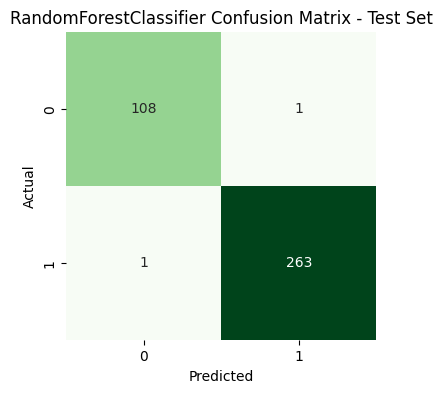

Sensitivity: 0.997
Specificity: 0.991
F1 Score: 0.997
Precision: 0.997
Negative Predictive Value: 0.991
False Negative Rate: 0.004
False Positive Rate: 0.01
False Discovery Rate: 0.004
False Omission Rate: 0.01

5-Fold Cross-Validation Scores:
[1.        1.        1.        0.9955157 1.       ]

Average Cross-Validation Accuracy: 100.00%


In [ ]:
# In[36]:


fun(rfc,"RandomForestClassifier")


Training Accuracy: 99.911

Testing Accuracy: 99.464
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       109
         1.0       0.99      1.00      1.00       264

    accuracy                           0.99       373
   macro avg       1.00      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



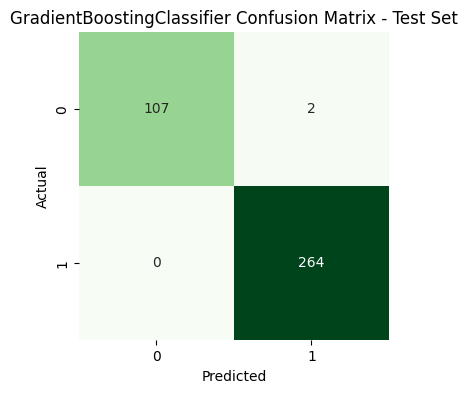

Sensitivity: 1.0
Specificity: 0.982
F1 Score: 0.997
Precision: 0.993
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.019
False Discovery Rate: 0.008
False Omission Rate: 0.0

5-Fold Cross-Validation Scores:
[0.99553571 1.         0.99103139 0.99103139 1.        ]

Average Cross-Validation Accuracy: 99.60%


In [ ]:
# In[37]:


fun(gbc,"GradientBoostingClassifier")


Training Accuracy: 99.552

Testing Accuracy: 98.928
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       109
         1.0       0.99      1.00      0.99       264

    accuracy                           0.99       373
   macro avg       0.99      0.98      0.99       373
weighted avg       0.99      0.99      0.99       373



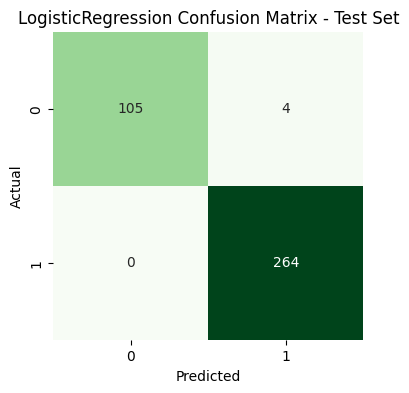

Sensitivity: 1.0
Specificity: 0.964
F1 Score: 0.993
Precision: 0.986
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.037
False Discovery Rate: 0.015
False Omission Rate: 0.0

5-Fold Cross-Validation Scores:
[0.99553571 0.99103139 0.98206278 0.99103139 1.        ]

Average Cross-Validation Accuracy: 99.20%


In [ ]:
# In[38]:


fun(model,"LogisticRegression")


Training Accuracy: 99.284

Testing Accuracy: 29.223
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45       109
         1.0       0.00      0.00      0.00       264

    accuracy                           0.29       373
   macro avg       0.15      0.50      0.23       373
weighted avg       0.09      0.29      0.13       373



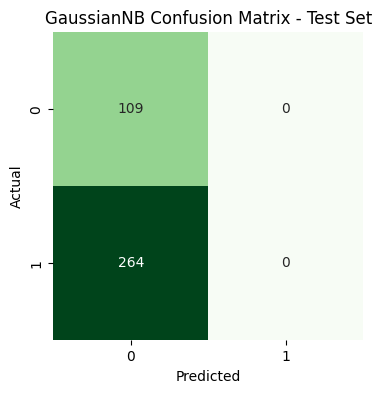

Sensitivity: 0.0
Specificity: 1.0
F1 Score: 0.0
Precision: nan
Negative Predictive Value: 0.293
False Negative Rate: 1.0
False Positive Rate: 0.0
False Discovery Rate: nan
False Omission Rate: 0.708

5-Fold Cross-Validation Scores:
[1.         0.98654709 0.99103139 0.98654709 1.        ]

Average Cross-Validation Accuracy: 99.30%


In [ ]:
# In[39]:


fun(gnb,"GaussianNB")

In [ ]:
# In[40]:


compare = pd.DataFrame({'Model': ['RANDOM FOREST','GRADIENT BOOSTING CLASSIFIER','LOGISTIC REGRESSION','NAIVE BAYES'],
                        'Accuracy': [accuracy1*100,accuracy3*100, accuracy4*100, accuracy2*100],
                        'Training Accuracy':Training_Accuracy_L,
                        'Test Accuracy':Test_Accuracy_L,
                        'Sensitivity':Sensitivity_L,
                        'Specificity':Specificity_L,
                        'F1 Score':F1Score_L,
                        'Precision':Precision_L,
                        'Negative Predictive Value':Negative_Predictive_Value_L,
                        'False Negative Rate':False_Negative_Rate_L,
                        'False Positive Rate':False_Positive_Rate_L,
                        'False Discovery Rate':False_Discovery_Rate_L,
                        'False Omission Rate':False_Omission_Rate_L,
                        'Average cv-accuracy':average_cv_accuracy_L })
compare.sort_values(by='Accuracy', ascending=False)



,Model,Accuracy,Training Accuracy,Test Accuracy,Sensitivity,Specificity,F1 Score,Precision,Negative Predictive Value,False Negative Rate,False Positive Rate,False Discovery Rate,False Omission Rate,Average cv-accuracy
0,RANDOM FOREST,99.463807,100.000,99.464,0.997,0.991,0.997,0.997,0.991,0.004,0.010,0.004,0.010,1.000
1,GRADIENT BOOSTING CLASSIFIER,99.463807,99.911,99.464,1.000,0.982,0.997,0.993,1.000,0.000,0.019,0.008,0.000,0.996
2,LOGISTIC REGRESSION,98.927614,99.552,98.928,1.000,0.964,0.993,0.986,1.000,0.000,0.037,0.015,0.000,0.992
3,NAIVE BAYES,29.222520,99.284,29.223,0.000,1.000,0.000,NaN,0.293,1.000,0.000,NaN,0.708,0.993


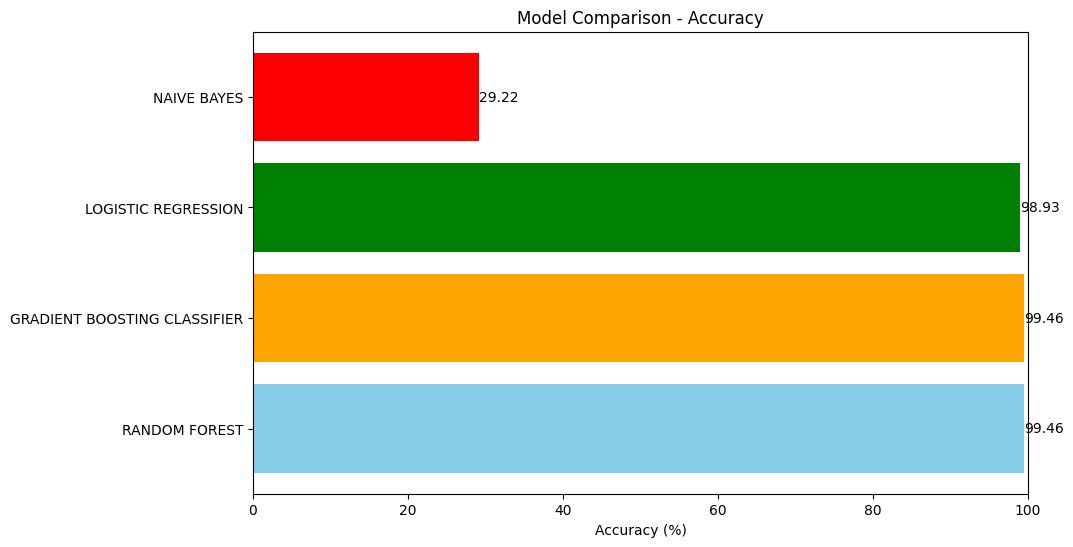

In [ ]:
# In[41]:


colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink']
plt.figure(figsize=(10, 6))
plt.barh(compare['Model'], compare['Accuracy'], color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 100)
for index, value in enumerate(compare['Accuracy']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.show()

